In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from windrose import WindroseAxes
import numpy as np

In [2]:
df = pd.read_csv('../../data/sierraleone-bumbuna.csv',  parse_dates=["Timestamp"])

In [3]:
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04:00,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [43]:
df.tail()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,...,TModA,TModB,Comments,Z_GHI,Z_DNI,Z_DHI,Z_ModA,Z_ModB,Z_WS,Z_WSgust
525595,2022-10-29 23:56:00,-1.6,-0.1,-2.9,0.0,0.0,24.0,100.0,0.0,0.0,...,24.2,24.5,NaN,-0.681946,-0.532701,-0.733712,-0.686758,-0.685782,-0.924846,-1.046105
525596,2022-10-29 23:57:00,-1.7,-0.1,-3.0,0.0,0.0,24.0,100.0,0.0,0.0,...,24.2,24.5,NaN,-0.682281,-0.532701,-0.734342,-0.686758,-0.685782,-0.924846,-1.046105
525597,2022-10-29 23:58:00,-1.7,-0.1,-3.1,0.0,0.0,24.0,100.0,0.0,0.0,...,24.1,24.4,NaN,-0.682281,-0.532701,-0.734971,-0.686758,-0.685782,-0.924846,-1.046105
525598,2022-10-29 23:59:00,-1.7,-0.2,-3.3,0.0,0.0,23.9,100.0,0.0,0.0,...,24.1,24.4,NaN,-0.682281,-0.533158,-0.736229,-0.686758,-0.685782,-0.924846,-1.046105
525599,2022-10-30 00:00:00,-1.7,-0.1,-3.4,0.0,0.0,23.9,100.0,0.0,0.0,...,24.1,24.4,NaN,-0.682281,-0.532701,-0.736858,-0.686758,-0.685782,-0.924846,-1.046105


In [4]:
df.describe()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,2022-04-30 12:00:30.000000768,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
min,2021-10-30 00:01:00,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,2022-01-29 06:00:45,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,2022-04-30 12:00:30,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,2022-07-30 18:00:15,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,2022-10-30 00:00:00,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN
std,NaN,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

In [7]:
df.value_counts('Timestamp')

Timestamp
2021-10-30 00:01:00    1
2022-06-30 06:36:00    1
2022-06-30 08:10:00    1
2022-06-30 08:09:00    1
2022-06-30 08:08:00    1
                      ..
2022-02-28 15:55:00    1
2022-02-28 15:54:00    1
2022-02-28 15:53:00    1
2022-02-28 15:52:00    1
2022-10-30 00:00:00    1
Name: count, Length: 525600, dtype: int64

In [8]:
df.dtypes

Timestamp        datetime64[ns]
GHI                     float64
DNI                     float64
DHI                     float64
ModA                    float64
ModB                    float64
Tamb                    float64
RH                      float64
WS                      float64
WSgust                  float64
WSstdev                 float64
WD                      float64
WDstdev                 float64
BP                        int64
Cleaning                  int64
Precipitation           float64
TModA                   float64
TModB                   float64
Comments                float64
dtype: object

In [9]:
df['Timestamp'].min()


Timestamp('2021-10-30 00:01:00')

In [10]:
df['Timestamp'].max()

Timestamp('2022-10-30 00:00:00')

In [11]:
df.groupby('Precipitation').size()


Precipitation
0.0    513531
0.1      8002
0.2      1580
0.3       771
0.4       456
0.5       314
0.6       245
0.7       172
0.8       136
0.9       102
1.0        60
1.1        61
1.2        45
1.3        40
1.4        23
1.5        13
1.6        20
1.7        11
1.8         5
1.9         6
2.0         3
2.1         1
2.3         1
2.4         2
dtype: int64

In [12]:
missing_percent = (df.isna().sum() / len(df)) * 100


columns_with_nulls = missing_percent[missing_percent > 5]
print(columns_with_nulls)

Comments    100.0
dtype: float64


In [13]:
def detect_outliers(df, cols):
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1
    return df[((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR)))]

outliers = detect_outliers(df, ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"])
print("Outliers detected:\n", outliers)

Outliers detected:
        Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb  RH  WS  WSgust  WSstdev  \
0            NaT  NaN  NaN  NaN   NaN   NaN   NaN NaN NaN     NaN      NaN   
1            NaT  NaN  NaN  NaN   NaN   NaN   NaN NaN NaN     NaN      NaN   
2            NaT  NaN  NaN  NaN   NaN   NaN   NaN NaN NaN     NaN      NaN   
3            NaT  NaN  NaN  NaN   NaN   NaN   NaN NaN NaN     NaN      NaN   
4            NaT  NaN  NaN  NaN   NaN   NaN   NaN NaN NaN     NaN      NaN   
...          ...  ...  ...  ...   ...   ...   ...  ..  ..     ...      ...   
525595       NaT  NaN  NaN  NaN   NaN   NaN   NaN NaN NaN     NaN      NaN   
525596       NaT  NaN  NaN  NaN   NaN   NaN   NaN NaN NaN     NaN      NaN   
525597       NaT  NaN  NaN  NaN   NaN   NaN   NaN NaN NaN     NaN      NaN   
525598       NaT  NaN  NaN  NaN   NaN   NaN   NaN NaN NaN     NaN      NaN   
525599       NaT  NaN  NaN  NaN   NaN   NaN   NaN NaN NaN     NaN      NaN   

        WD  WDstdev  BP  Cleaning  Precipit

In [14]:
from scipy.stats import zscore


z_cols = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]
df["Z_GHI"] = zscore(df["GHI"])
df["Z_DNI"] = zscore(df["DNI"])
df["Z_DHI"] = zscore(df["DHI"])
df["Z_ModA"] = zscore(df["ModA"])
df["Z_ModB"] = zscore(df["ModB"])
df["Z_WS"] = zscore(df["WS"])
df["Z_WSgust"] = zscore(df["WSgust"])

# Flag rows with |Z| > 3
outliers_z = df[(df[z_cols].apply(lambda x: abs(x) > 3)).any(axis=1)]
print("Z-score based outliers:\n", outliers_z)

Z-score based outliers:
                  Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb     RH   WS  \
404    2021-10-30 06:45:00  1.9 -0.1  1.9   3.2   3.1  22.0   98.4  1.7   
405    2021-10-30 06:46:00  2.3 -0.1  2.3   3.7   3.5  22.0   98.4  1.7   
406    2021-10-30 06:47:00  2.8 -0.1  2.8   4.2   4.0  22.0   98.4  1.1   
407    2021-10-30 06:48:00  3.3 -0.1  3.3   4.8   4.6  22.0   98.5  1.4   
408    2021-10-30 06:49:00  3.9 -0.1  3.9   5.4   5.2  22.0   98.5  1.5   
...                    ...  ...  ...  ...   ...   ...   ...    ...  ...   
525578 2022-10-29 23:39:00 -1.9 -0.2 -3.3   0.0   0.0  23.8  100.0  0.0   
525579 2022-10-29 23:40:00 -1.8 -0.1 -3.1   0.0   0.0  23.9  100.0  0.0   
525597 2022-10-29 23:58:00 -1.7 -0.1 -3.1   0.0   0.0  24.0  100.0  0.0   
525598 2022-10-29 23:59:00 -1.7 -0.2 -3.3   0.0   0.0  23.9  100.0  0.0   
525599 2022-10-30 00:00:00 -1.7 -0.1 -3.4   0.0   0.0  23.9  100.0  0.0   

        WSgust  ...  TModA  TModB  Comments     Z_GHI     Z_DNI     Z_DHI 

In [15]:
# Drop rows where key columns are missing
df_cleaned = df.dropna(subset=z_cols)

# Impute missing values using the median
df_imputed = df.fillna(df.median())

print("Final cleaned dataset:\n", df_cleaned.head())

Final cleaned dataset:
             Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0 2021-10-30 00:01:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.1  0.0     0.0   
1 2021-10-30 00:02:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2 2021-10-30 00:03:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
3 2021-10-30 00:04:00 -0.7  0.0 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
4 2021-10-30 00:05:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   

   ...  TModA  TModB  Comments     Z_GHI     Z_DNI   Z_DHI    Z_ModA  \
0  ...   22.3   22.6       NaN -0.678931 -0.532701 -0.7205 -0.686758   
1  ...   22.3   22.6       NaN -0.678931 -0.532701 -0.7205 -0.686758   
2  ...   22.3   22.6       NaN -0.678931 -0.532701 -0.7205 -0.686758   
3  ...   22.3   22.6       NaN -0.678931 -0.532243 -0.7205 -0.686758   
4  ...   22.3   22.6       NaN -0.678931 -0.532701 -0.7205 -0.686758   

     Z_ModB      Z_WS  Z_WSgust  
0 -0.685782 -0.924846 -1.046105  
1 -0.685782 

In [16]:
country = "Sierraleone" 
file_path = f"../../data/{country.lower()}_clean.csv"

# Export to CSV
df_cleaned.to_csv(file_path, index=False)
print(f"Cleaned data saved at: {file_path}")

Cleaned data saved at: ../../data/sierraleone_clean.csv


In [21]:
cleaneddf = pd.read_csv("../../data/sierraleone_clean.csv", parse_dates=["Timestamp"])

In [22]:
cleaneddf.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,...,TModA,TModB,Comments,Z_GHI,Z_DNI,Z_DHI,Z_ModA,Z_ModB,Z_WS,Z_WSgust
0,2021-10-30 00:01:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,...,22.3,22.6,NaN,-0.678931,-0.532701,-0.7205,-0.686758,-0.685782,-0.924846,-1.046105
1,2021-10-30 00:02:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,...,22.3,22.6,NaN,-0.678931,-0.532701,-0.7205,-0.686758,-0.685782,-0.924846,-1.046105
2,2021-10-30 00:03:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,...,22.3,22.6,NaN,-0.678931,-0.532701,-0.7205,-0.686758,-0.685782,-0.924846,-1.046105
3,2021-10-30 00:04:00,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,...,22.3,22.6,NaN,-0.678931,-0.532243,-0.7205,-0.686758,-0.685782,-0.924846,-1.046105
4,2021-10-30 00:05:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,...,22.3,22.6,NaN,-0.678931,-0.532701,-0.7205,-0.686758,-0.685782,-0.924846,-1.046105


In [23]:
# Checking if there are still any null values
missing_percent = (cleaneddf.isna().sum() / len(cleaneddf)) * 100


columns_with_nulls = missing_percent[missing_percent > 5]
print(columns_with_nulls)

Comments    100.0
dtype: float64


In [24]:
cleaneddf["GHI"].describe()

count    525600.000000
mean        201.957515
std         298.495150
min         -19.500000
25%          -2.800000
50%           0.300000
75%         362.400000
max        1499.000000
Name: GHI, dtype: float64

In [25]:
cleaneddf["DNI"].describe()

count    525600.000000
mean        116.376337
std         218.652659
min          -7.800000
25%          -0.300000
50%          -0.100000
75%         107.000000
max         946.000000
Name: DNI, dtype: float64

In [26]:
cleaneddf["DHI"].describe()

count    525600.000000
mean        113.720571
std         158.946032
min         -17.900000
25%          -3.800000
50%          -0.100000
75%         224.700000
max         892.000000
Name: DHI, dtype: float64

In [27]:
cleaneddf.set_index("Timestamp", inplace=True)

# Resampling by day for smoother trends
df_daily = cleaneddf.resample("D").mean()

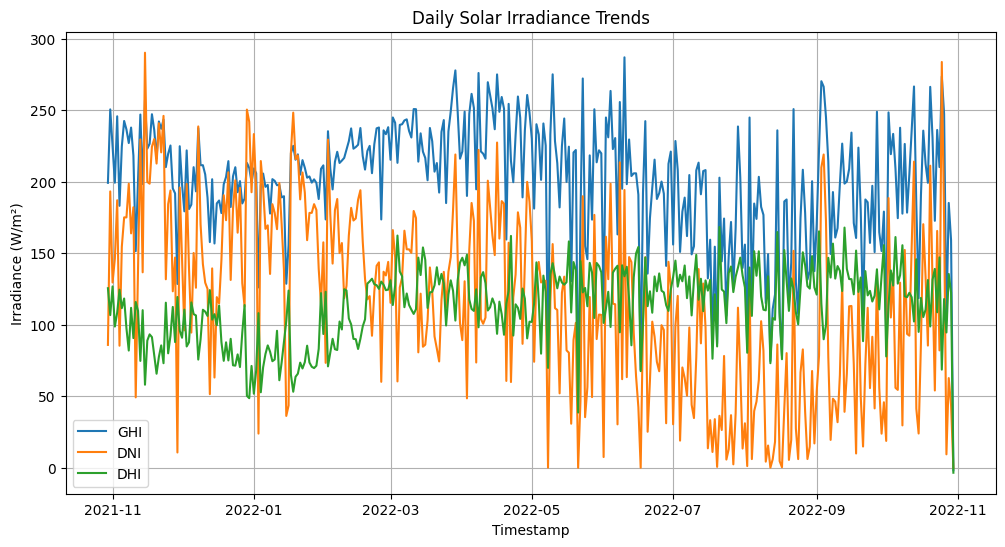

In [28]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_daily, x=df_daily.index, y="GHI", label="GHI")
sns.lineplot(data=df_daily, x=df_daily.index, y="DNI", label="DNI")
sns.lineplot(data=df_daily, x=df_daily.index, y="DHI", label="DHI")

plt.xlabel("Timestamp")
plt.ylabel("Irradiance (W/m²)")
plt.title("Daily Solar Irradiance Trends")
plt.legend()
plt.grid()
plt.show()

C:\Users\Abdilfatah\AppData\Local\Temp\ipykernel_14472\3035511516.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = cleaneddf.resample("M").mean()


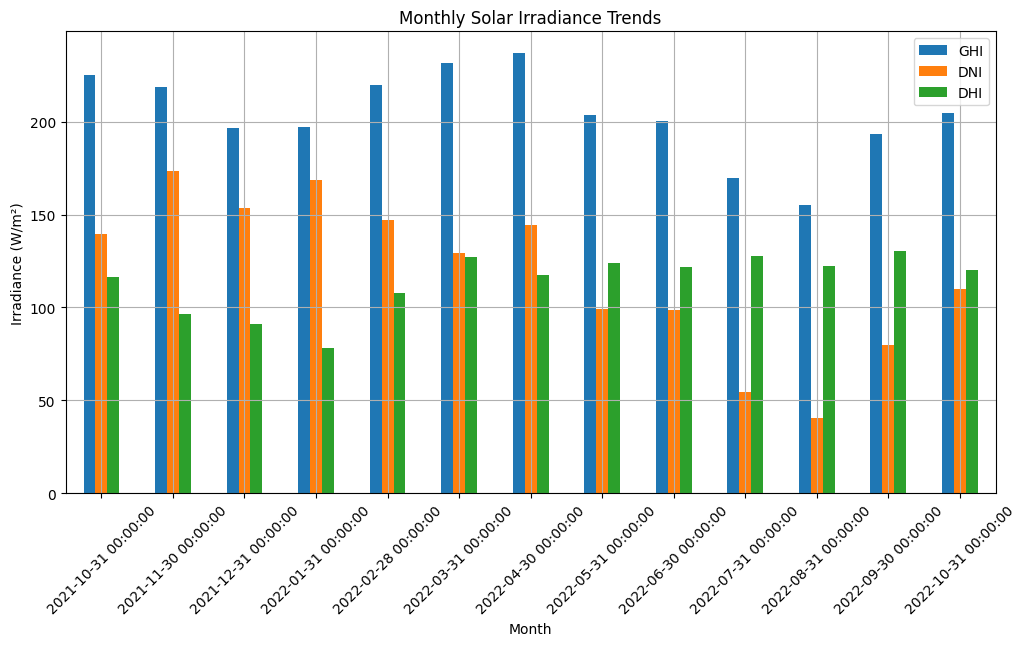

In [29]:
df_monthly = cleaneddf.resample("M").mean()
df_monthly.plot(kind="bar", figsize=(12, 6), y=["GHI", "DNI", "DHI"])
plt.title("Monthly Solar Irradiance Trends")
plt.xlabel("Month")
plt.ylabel("Irradiance (W/m²)")
plt.xticks(rotation=45)
plt.grid()
plt.show()

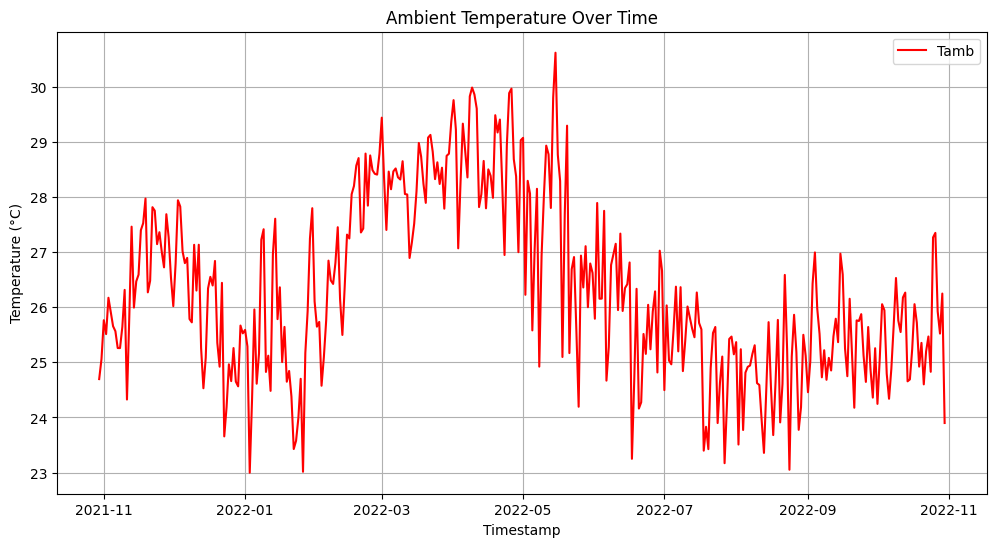

In [30]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_daily, x=df_daily.index, y="Tamb", color="red", label="Tamb")
plt.xlabel("Timestamp")
plt.ylabel("Temperature (°C)")
plt.title("Ambient Temperature Over Time")
plt.legend()
plt.grid()
plt.show()

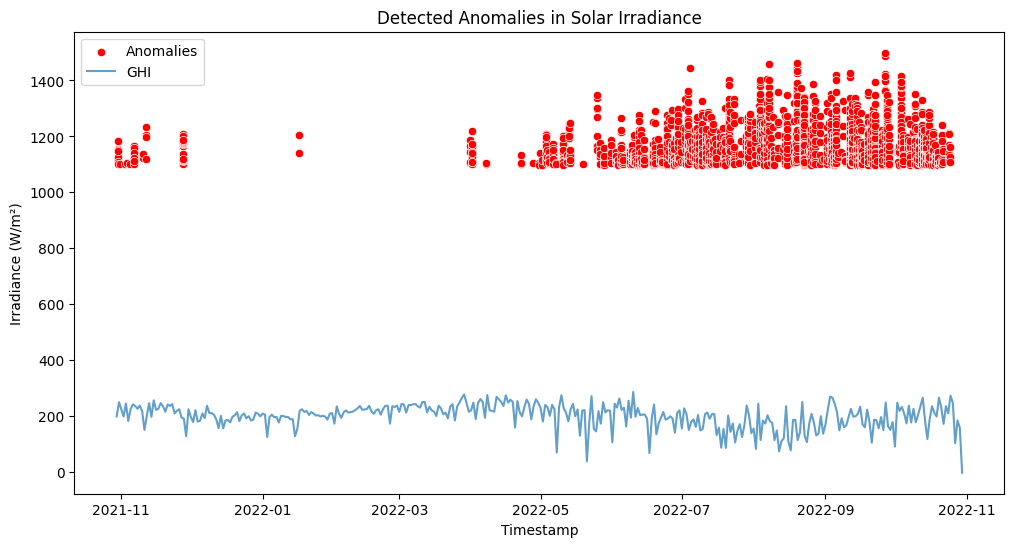

In [31]:
from scipy.stats import zscore

# Compute Z-scores
cleaneddf["Z_GHI"] = zscore(cleaneddf["GHI"])
df_anomalies = cleaneddf[cleaneddf["Z_GHI"].abs() > 3]  # Flagged anomalies (|Z| > 3)

# Plot anomalies
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_anomalies, x=df_anomalies.index, y="GHI", color="red", label="Anomalies")
sns.lineplot(data=df_daily, x=df_daily.index, y="GHI", label="GHI", alpha=0.7)
plt.xlabel("Timestamp")
plt.ylabel("Irradiance (W/m²)")
plt.title("Detected Anomalies in Solar Irradiance")
plt.legend()
plt.show()

### Less Predictable and sensative to external factors compared to Benin ###

In [32]:
# Group by Cleaning flag and compute mean
cleaning_avg = cleaneddf.groupby("Cleaning")[["ModA", "ModB"]].mean()
print(cleaning_avg)

                ModA        ModB
Cleaning                        
0         206.578599  198.038150
1         273.309252  277.231102


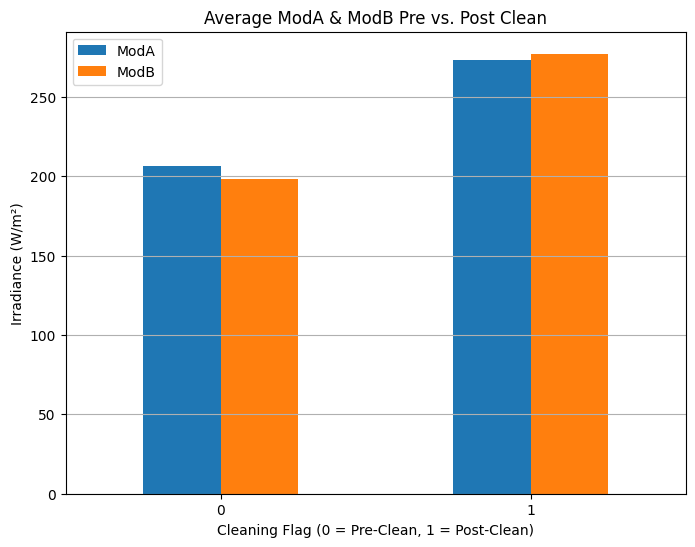

In [33]:
# Plot
cleaning_avg.plot(kind="bar", figsize=(8, 6), rot=0)
plt.title("Average ModA & ModB Pre vs. Post Clean")
plt.xlabel("Cleaning Flag (0 = Pre-Clean, 1 = Post-Clean)")
plt.ylabel("Irradiance (W/m²)")
plt.legend(["ModA", "ModB"])
plt.grid(axis="y")
plt.show()

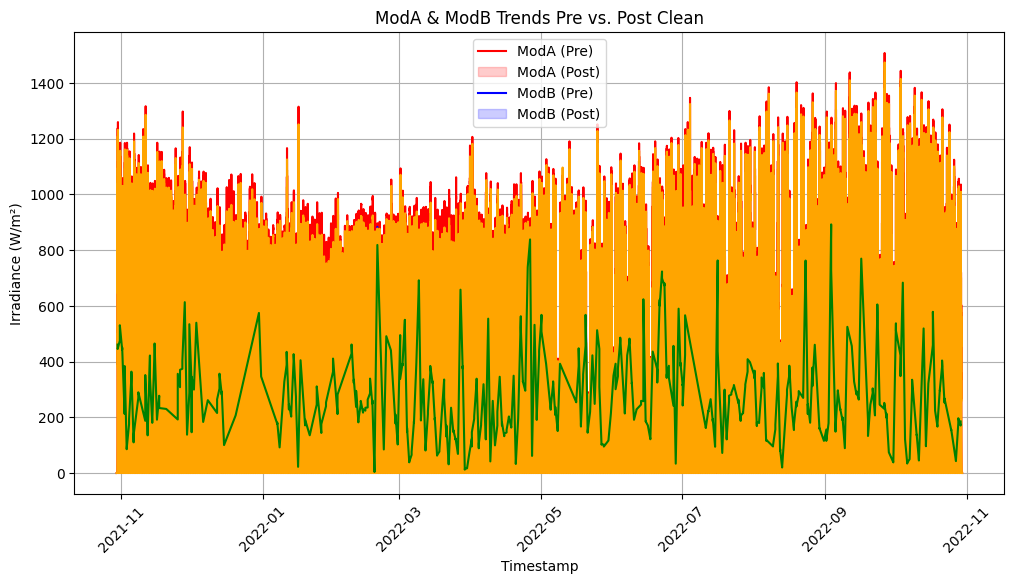

In [34]:
# Set figure size
plt.figure(figsize=(12, 6))

# Line plot showing ModA and ModB values pre vs. post clean
sns.lineplot(data=cleaneddf, x="Timestamp", y="ModA", hue="Cleaning", palette=["red", "blue"])
sns.lineplot(data=cleaneddf, x="Timestamp", y="ModB", hue="Cleaning", palette=["orange", "green"])

plt.title("ModA & ModB Trends Pre vs. Post Clean")
plt.xlabel("Timestamp")
plt.ylabel("Irradiance (W/m²)")
plt.legend(["ModA (Pre)", "ModA (Post)", "ModB (Pre)", "ModB (Post)"])
plt.xticks(rotation=45)
plt.grid()
plt.show()

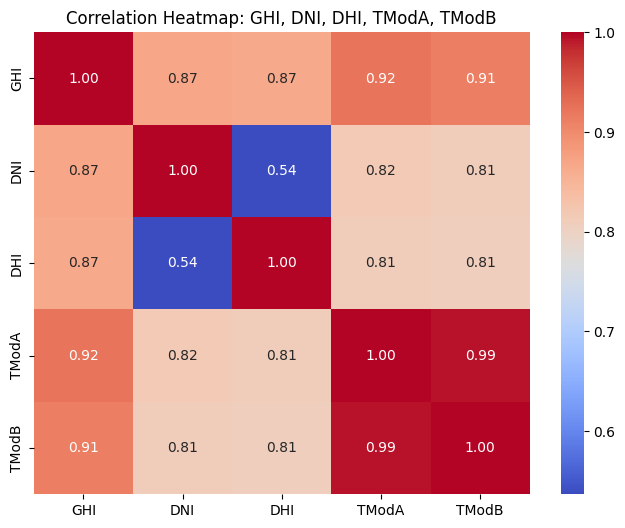

In [35]:
# Select relevant columns
corr_cols = ["GHI", "DNI", "DHI", "TModA", "TModB"]

# Compute correlation matrix
corr_matrix = cleaneddf[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: GHI, DNI, DHI, TModA, TModB")
plt.show()

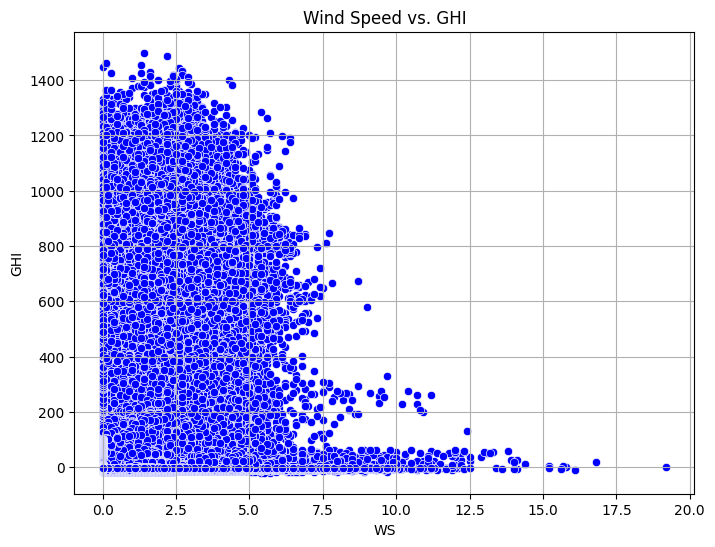

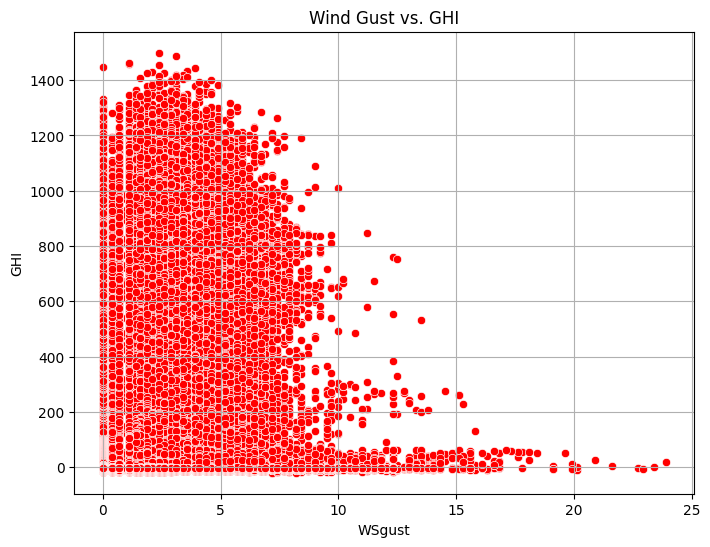

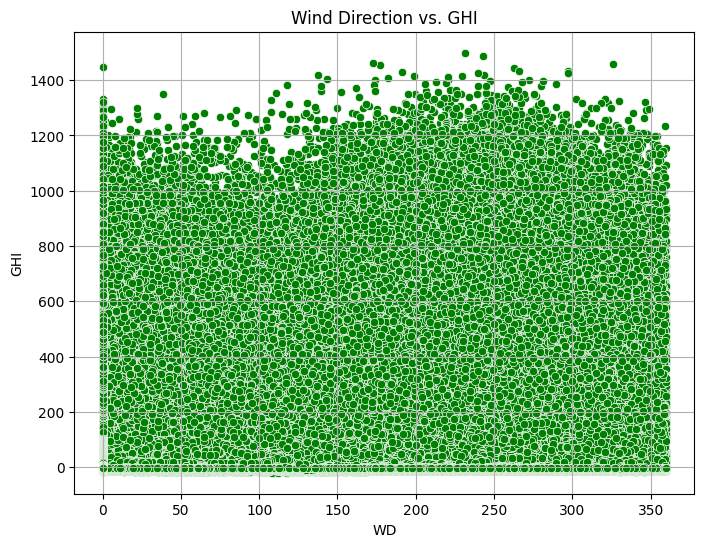

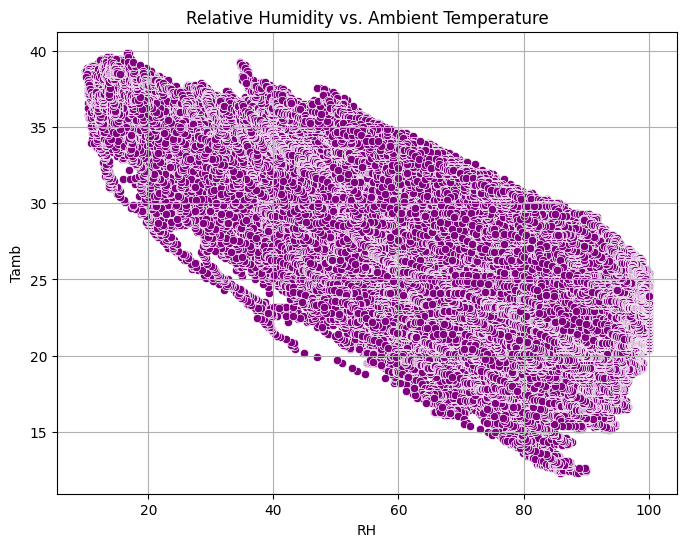

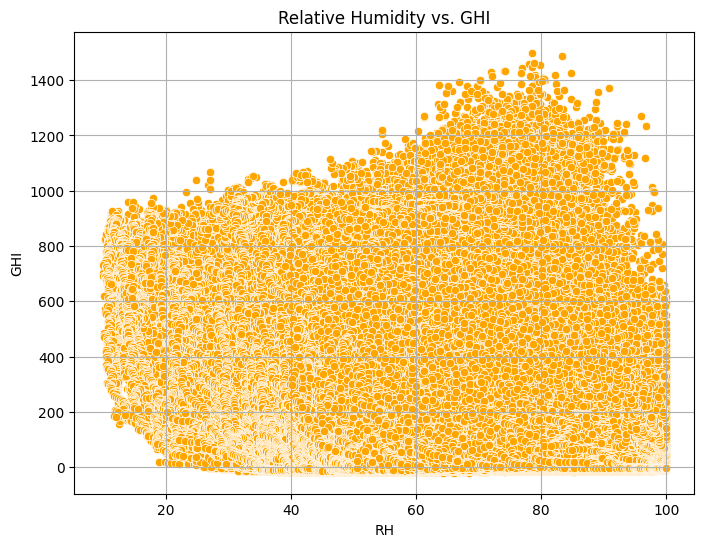

In [36]:
# Define scatter plot function
def scatter_plot(x, y, title, color):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=cleaneddf, x=x, y=y, color=color)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)
    plt.grid()
    plt.show()

# Wind speed variables vs. GHI
scatter_plot("WS", "GHI", "Wind Speed vs. GHI", "blue")
scatter_plot("WSgust", "GHI", "Wind Gust vs. GHI", "red")
scatter_plot("WD", "GHI", "Wind Direction vs. GHI", "green")

# Relative Humidity vs. Temperature or GHI
scatter_plot("RH", "Tamb", "Relative Humidity vs. Ambient Temperature", "purple")
scatter_plot("RH", "GHI", "Relative Humidity vs. GHI", "orange")

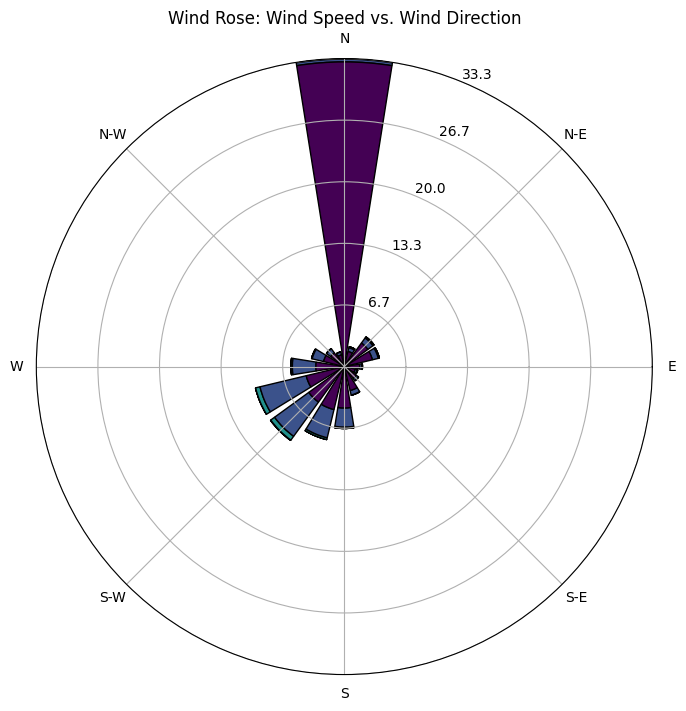

In [37]:
# Set up wind rose plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="windrose")

ax.bar(cleaneddf["WD"], cleaneddf["WS"], bins=np.arange(0, 10, 2), normed=True, opening=0.8, edgecolor="black")
ax.set_title("Wind Rose: Wind Speed vs. Wind Direction")
plt.show()

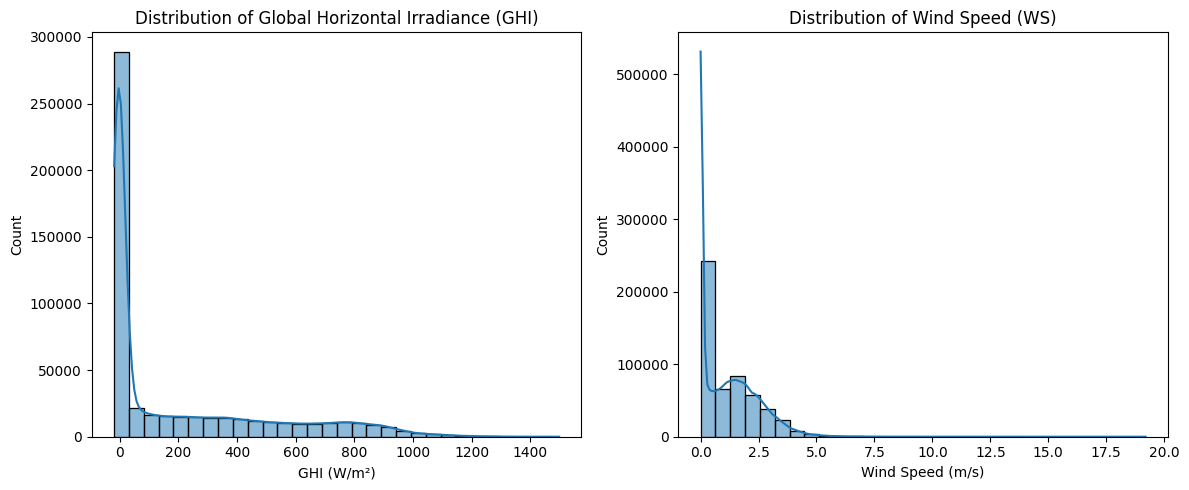

In [38]:
# Set up figure
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram of GHI
sns.histplot(cleaneddf["GHI"], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Distribution of Global Horizontal Irradiance (GHI)")
axes[0].set_xlabel("GHI (W/m²)")
axes[0].set_ylabel("Count")

# Histogram of Wind Speed (WS)
sns.histplot(cleaneddf["WS"], bins=30, kde=True, ax=axes[1])
axes[1].set_title("Distribution of Wind Speed (WS)")
axes[1].set_xlabel("Wind Speed (m/s)")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

In [39]:
# Compute correlation matrix for RH, Tamb, and solar radiation variables
corr_matrix = cleaneddf[["RH", "Tamb", "GHI", "DNI", "DHI"]].corr()
print(corr_matrix)

            RH      Tamb       GHI       DNI       DHI
RH    1.000000 -0.791937 -0.546677 -0.548800 -0.431910
Tamb -0.791937  1.000000  0.641261  0.578346  0.568655
GHI  -0.546677  0.641261  1.000000  0.869108  0.865815
DNI  -0.548800  0.578346  0.869108  1.000000  0.536710
DHI  -0.431910  0.568655  0.865815  0.536710  1.000000


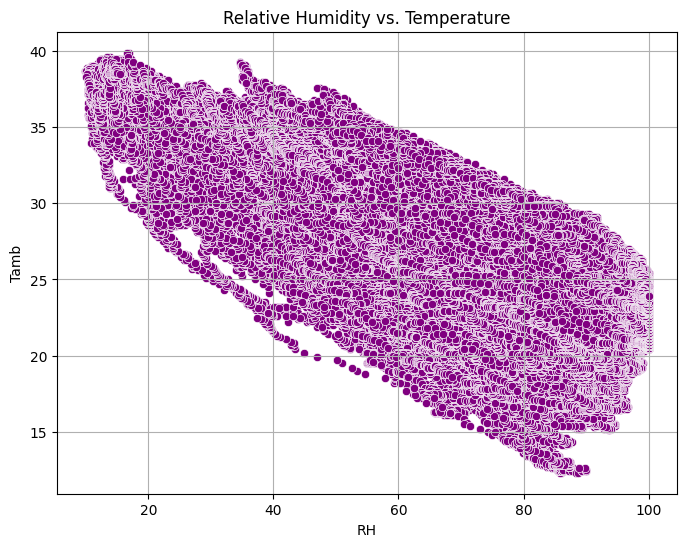

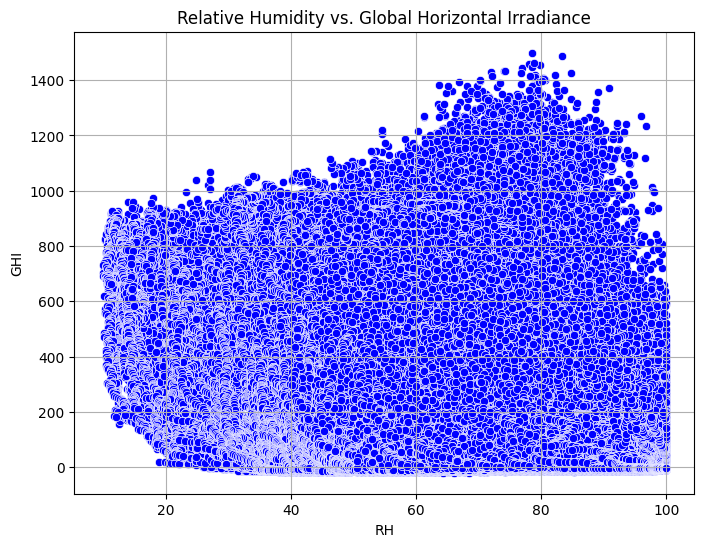

In [40]:
def scatter_plot(x, y, title, color):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=cleaneddf, x=x, y=y, color=color)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)
    plt.grid()
    plt.show()

# RH vs. Tamb (Temperature)
scatter_plot("RH", "Tamb", "Relative Humidity vs. Temperature", "purple")

# RH vs. GHI (Solar Radiation)
scatter_plot("RH", "GHI", "Relative Humidity vs. Global Horizontal Irradiance", "blue")


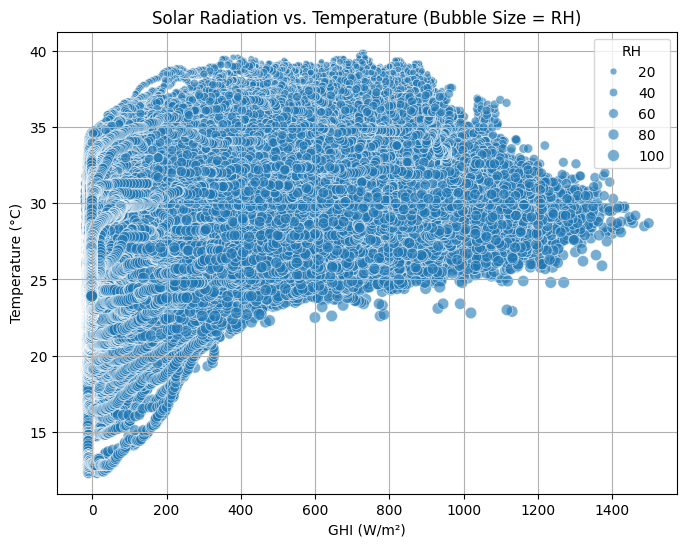

In [41]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cleaneddf, x="GHI", y="Tamb", size="RH", alpha=0.6)
plt.xlabel("GHI (W/m²)")
plt.ylabel("Temperature (°C)")
plt.title("Solar Radiation vs. Temperature (Bubble Size = RH)")
plt.grid()
plt.show()

C:\Users\Abdilfatah\AppData\Local\Temp\ipykernel_14472\695151756.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


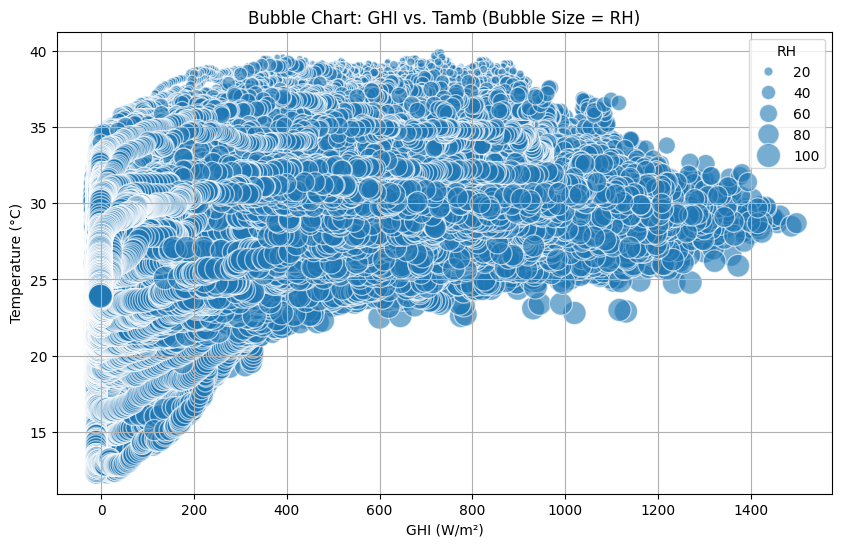

In [42]:
plt.figure(figsize=(10, 6))

# Bubble chart: GHI vs. Tamb with bubble size = RH
sns.scatterplot(
    data=cleaneddf, x="GHI", y="Tamb", size="RH", alpha=0.6, sizes=(10, 300), palette="coolwarm"
)
plt.xlabel("GHI (W/m²)")
plt.ylabel("Temperature (°C)")
plt.title("Bubble Chart: GHI vs. Tamb (Bubble Size = RH)")
plt.grid()
plt.show()